# CIC0193 - Fundamentos de Sistemas Inteligentes -- Projeto 1

---


##Prof. Díbio 

#####Aluno: *Vitor Vasconelos de Oliveira*
#####Matrícula: *180114778*


# A estratégia utilizada no desenvolvimento do trabalho foi: 
*   Primeiro a união dos datasets "train" e "test" disponibilizados;
*   Posteriormente a partição desse dataset da união em 90% para treino e 10% para validação;
*   Aplicação da validação cruzada(10% novamente) na parte de treino para cada modelo; 
*   E por fim, resultados do melhor modelo na parte de validação. 





## **Realização dos imports com as bibliotecas e ferramentas necessárias:**

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn
import pylab as pl

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc

from sklearn.impute import KNNImputer

from scipy import interp

## **Leitura e pre-processamento dos dados:**



In [141]:
# Leitura dos dataframes de treino e teste disponibilizados no github
df_1=pd.read_csv('https://raw.githubusercontent.com/zahangirbd/medical_data_for_classification/master/data/Hepatitis/hepatitis.data.train.csv').replace('?', np.nan)

df_2=pd.read_csv('https://raw.githubusercontent.com/zahangirbd/medical_data_for_classification/master/data/Hepatitis/hepatitis.data.test.csv').replace('?', np.nan)

In [142]:
# Concatenação dos datasets devido ao tamanho pequeno para garantir uma boa pool de treino
df_train=pd.concat([df_1, df_2], ignore_index=True)
print(df_1.shape)
print(df_2.shape)
print(df_train.shape)

(80, 20)
(75, 20)
(155, 20)


In [143]:
df_train

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,CLASS
0,23,1,2,2,2,2,2,2,2,2,2,2,2,1,NaN,NaN,NaN,NaN,1,2
1,43,1,2,2,1,2,2,2,2,1,1,1,2,1.2,100,19,3.1,42,2,1
2,48,1,1,2,1,1,2,2,1,2,1,1,1,4.8,123,157,2.7,31,2,1
3,34,1,1,2,1,1,2,1,1,2,1,2,2,2.8,127,182,NaN,NaN,1,1
4,36,1,1,2,2,2,2,2,2,1,2,2,2,0.8,85,44,4.2,85,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,54,1,1,2,1,1,2,NaN,NaN,1,2,1,2,3.9,120,28,3.5,43,2,1
151,47,1,2,2,2,2,2,2,2,2,1,2,1,2,84,23,4.2,66,2,1
152,36,1,1,2,2,2,2,2,2,2,2,2,2,1.1,141,75,3.3,NaN,2,2
153,25,2,1,1,2,2,2,2,2,2,2,2,2,0.4,45,18,4.3,70,1,2


In [144]:
# Devido aos valores de "?" no dataset, fez-se necessária a subistiuição desses por valores válidos
# No caso foi utilizada a tecnida do KNN (k-nearest-neighbors)
imputer = KNNImputer(n_neighbors=5)
df_train = pd.DataFrame(imputer.fit_transform(df_train),columns = df_train.columns)

In [145]:
df_train

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,CLASS
0,23.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,91.6,26.2,4.3,68.2,1.0,2.0
1,43.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.2,100.0,19.0,3.1,42.0,2.0,1.0
2,48.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,4.8,123.0,157.0,2.7,31.0,2.0,1.0
3,34.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.8,127.0,182.0,3.7,50.6,1.0,1.0
4,36.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,0.8,85.0,44.0,4.2,85.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,54.0,1.0,1.0,2.0,1.0,1.0,2.0,1.6,1.4,1.0,2.0,1.0,2.0,3.9,120.0,28.0,3.5,43.0,2.0,1.0
151,47.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,84.0,23.0,4.2,66.0,2.0,1.0
152,36.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.1,141.0,75.0,3.3,50.2,2.0,2.0
153,25.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.4,45.0,18.0,4.3,70.0,1.0,2.0


## **Análise estatística inicial dos dados:**

In [146]:
# Utilizou-se a função "describe()" para análise inicial dos dados, mostrando as médias(mean) e desvios padrões(std) 
# Além de valores mínimos, máximos e porcentagens
print(df_train.describe(include='all'))

              AGE         SEX     STEROID  ANTIVIRALS     FATIGUE     MALAISE  \
count  155.000000  155.000000  155.000000  155.000000  155.000000  155.000000   
mean    41.200000    1.103226    1.507097    1.845161    1.352258    1.605161   
std     12.565878    0.305240    0.500014    0.362923    0.477593    0.489340   
min      7.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%     32.000000    1.000000    1.000000    2.000000    1.000000    1.000000   
50%     39.000000    1.000000    2.000000    2.000000    1.000000    2.000000   
75%     50.000000    1.000000    2.000000    2.000000    2.000000    2.000000   
max     78.000000    2.000000    2.000000    2.000000    2.000000    2.000000   

         ANOREXIA   LIVER_BIG  LIVER_FIRM  SPLEEN_PALPABLE     SPIDERS  \
count  155.000000  155.000000  155.000000       155.000000  155.000000   
mean     1.793548    1.827097    1.588387         1.802581    1.655484   
std      0.406070    0.370382    0.482547       

In [147]:
# Aqui podemos ver a váriavel CLASS, que é o nosso "Y", e sua partição
print(df_train.groupby('CLASS').size())

CLASS
1.0     32
2.0    123
dtype: int64


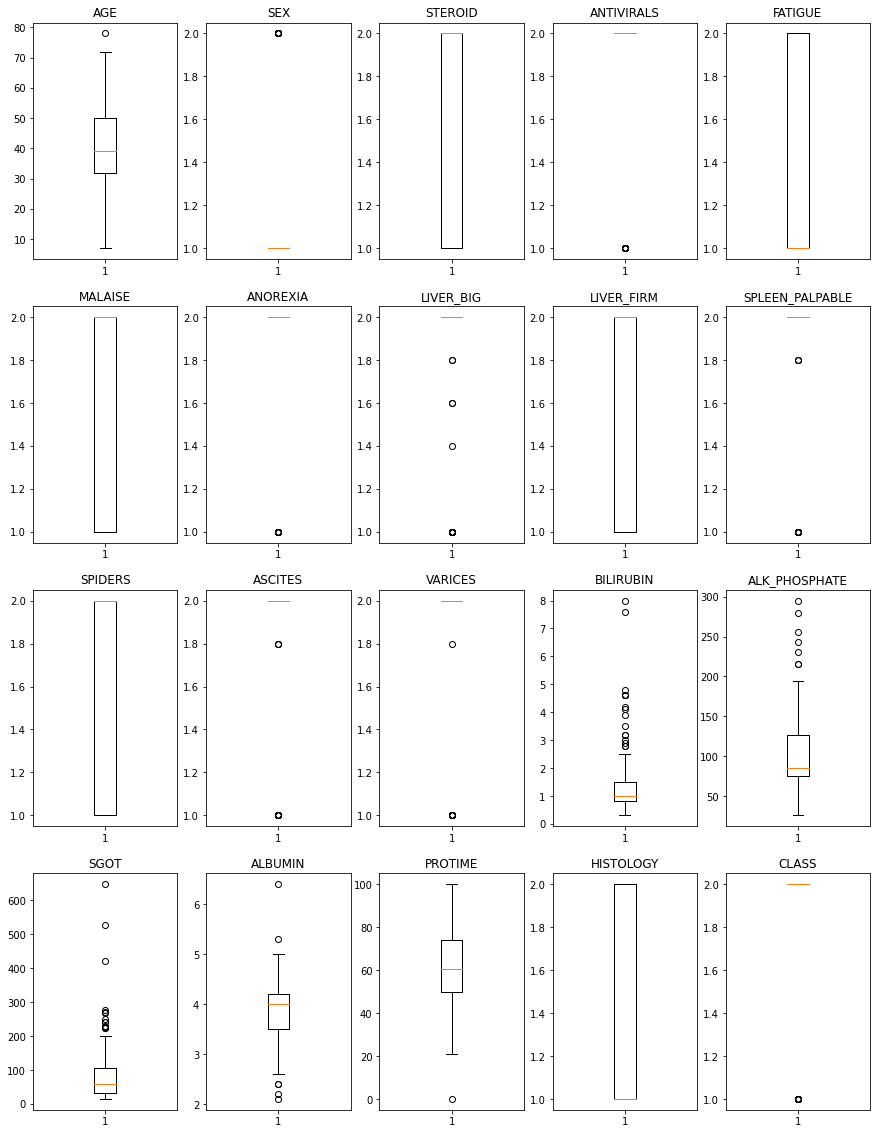

In [148]:
# Criação dos gráficos de caixa(box) para todas as features do dataset

fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(15, 20), sharey=False, sharex=False)

col = list(df_train.columns)
cont=0
for i in range(4):
  for j in range(5):
    ax[i,j].boxplot(df_train[col[cont]])
    ax[i,j].set_title(col[cont])
    cont+=1


fig.patch.set_facecolor('white')
pyplot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


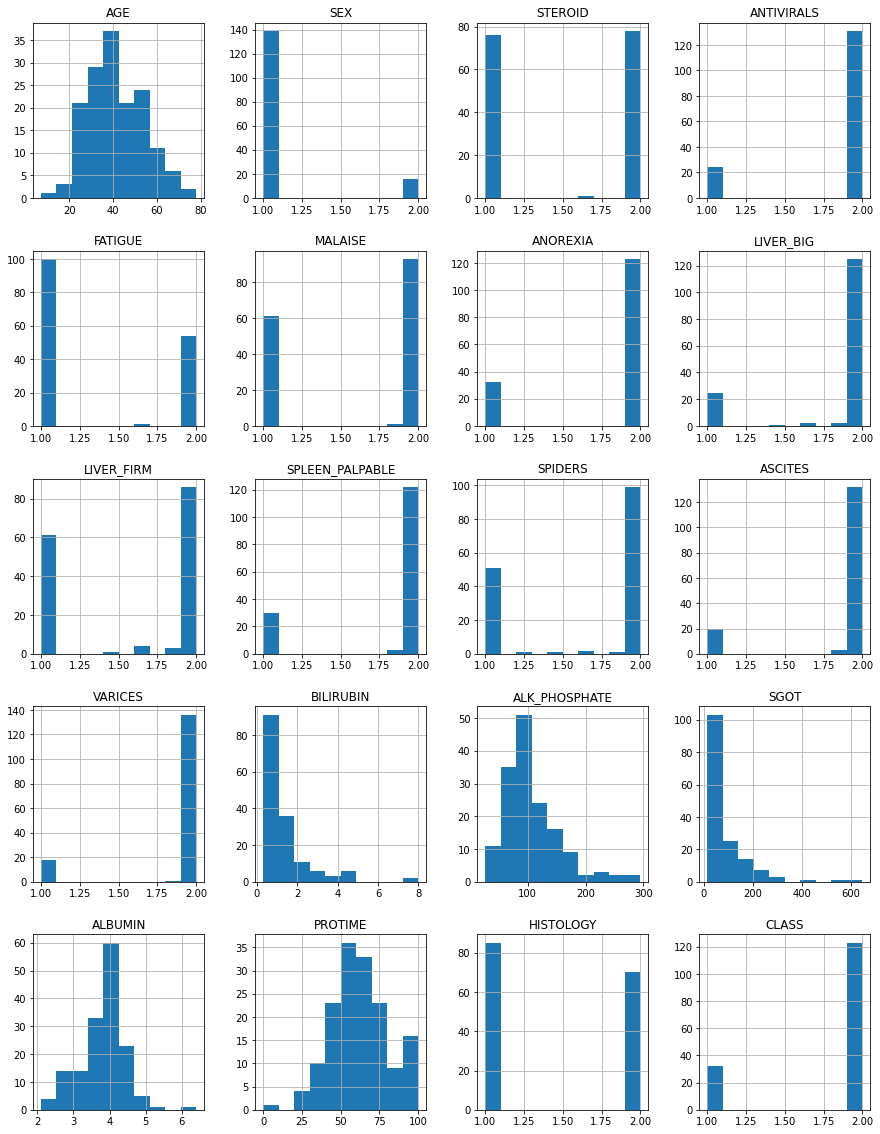

In [149]:
# Criando um histograma das features
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_train.hist(ax = ax)
fig.patch.set_facecolor('white')
pyplot.show()

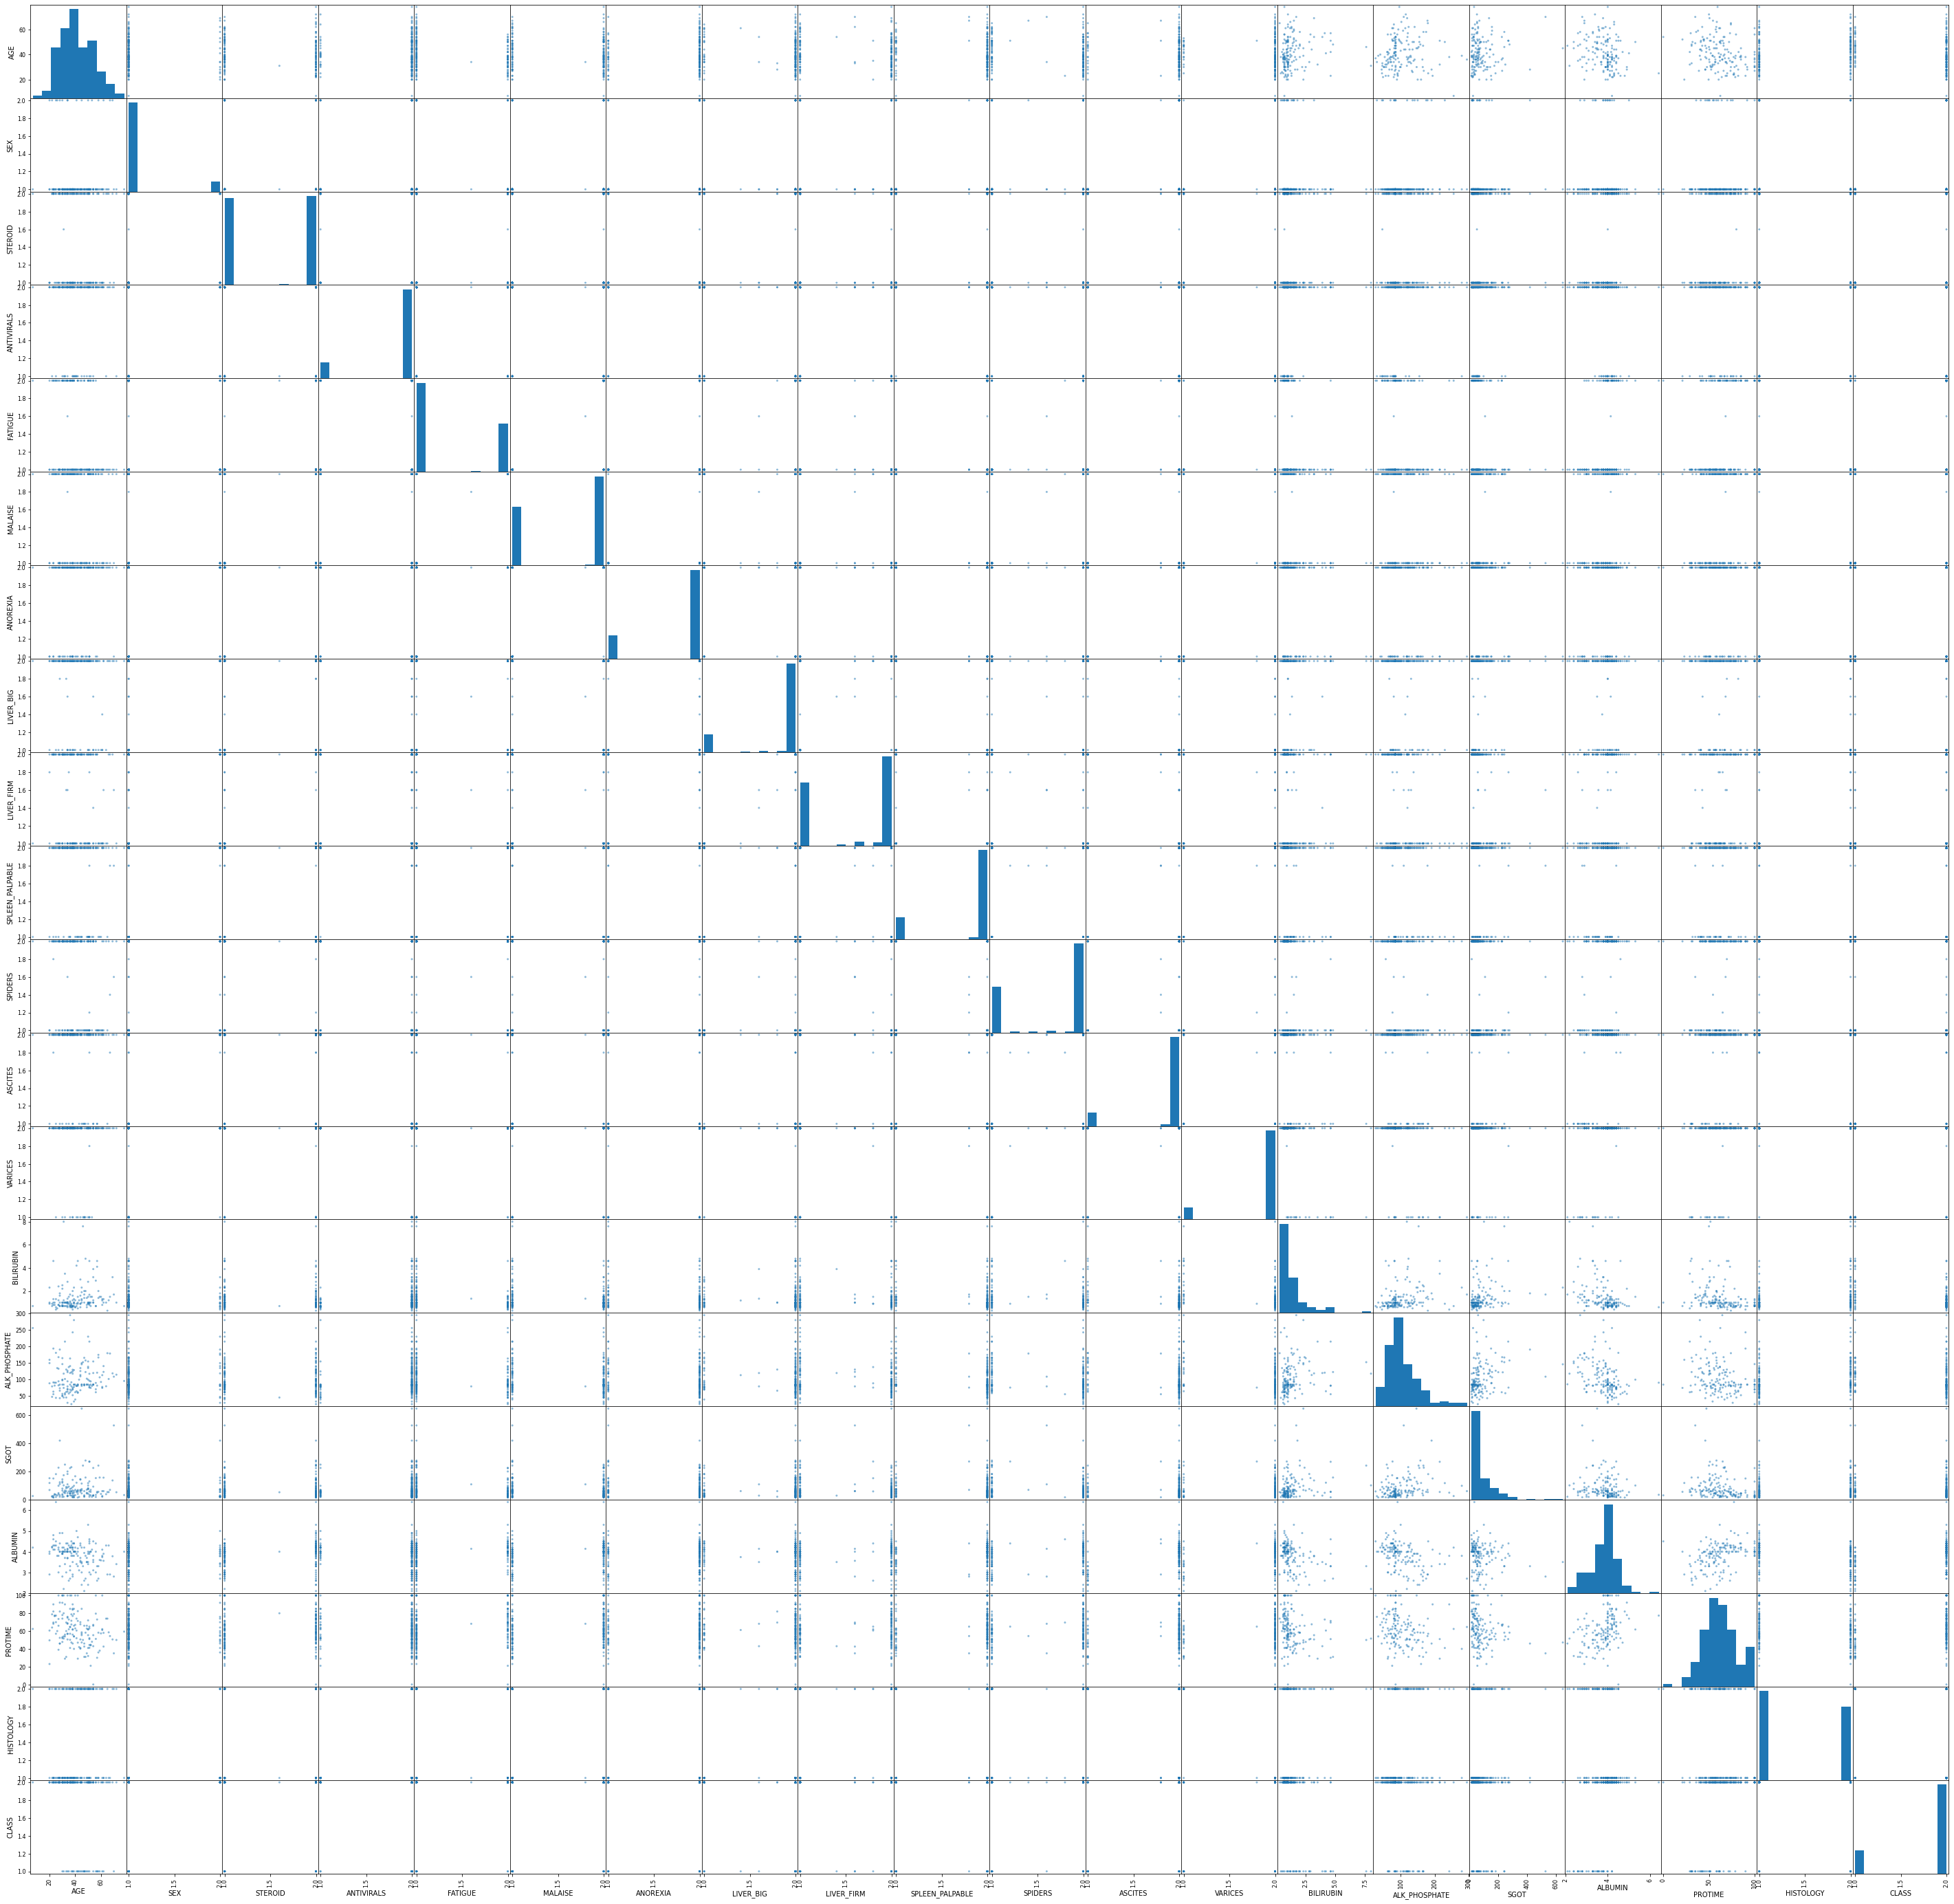

In [150]:
# Criando uma matriz de dispersão
scatter_matrix(df_train,figsize=(50, 50))
pyplot.show()

## **Organizando dados para treinamento e teste:**

In [151]:
# Extraindo todos o valores do dataset e separando em "X" os dados para classificação e "y" as classes
feature_cols = df_train.values
X = feature_cols[:,0:19]
y = [str(x) for x in feature_cols[:,19]]

In [152]:
print(X)

[[23.   1.   2.  ...  4.3 68.2  1. ]
 [43.   1.   2.  ...  3.1 42.   2. ]
 [48.   1.   1.  ...  2.7 31.   2. ]
 ...
 [36.   1.   1.  ...  3.3 50.2  2. ]
 [25.   2.   1.  ...  4.3 70.   1. ]
 [49.   1.   2.  ...  3.5 66.   1. ]]


In [153]:
print(y)

['2.0', '1.0', '1.0', '1.0', '2.0', '2.0', '2.0', '2.0', '2.0', '1.0', '2.0', '2.0', '2.0', '2.0', '2.0', '1.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '1.0', '2.0', '2.0', '1.0', '2.0', '1.0', '2.0', '2.0', '1.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '1.0', '2.0', '1.0', '1.0', '2.0', '1.0', '1.0', '2.0', '2.0', '1.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '1.0', '2.0', '2.0', '2.0', '1.0', '2.0', '2.0', '2.0', '1.0', '2.0', '2.0', '2.0', '2.0', '2.0', '1.0', '2.0', '2.0', '2.0', '1.0', '2.0', '1.0', '2.0', '1.0', '1.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '1.0', '2.0', '2.0', '2.0', '1.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '1.0', '1.0', '2.0', '2.0', '2.0', '2.0', '2.0'

In [154]:
 # Transformando em numpy array para facilitar manipulação
 X=np.array(X)
 y=np.array(y)

In [155]:
# Aqui ocorre a real divisão dos dados em treino e validação
# "dados-X" são as features para treino e validação 
# "dados-y" são as classificações para treino e validação 
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.10, random_state=1)

In [156]:
print(X_train)
print(X_validation)
print(Y_train)
print(Y_validation)

[[38.   1.   2.  ...  4.1 85.   2. ]
 [39.   1.   1.  ...  4.4 85.   1. ]
 [52.   1.   1.  ...  2.9 44.   2. ]
 ...
 [54.   1.   1.  ...  3.6 67.   2. ]
 [30.   1.   2.  ...  4.9 78.   1. ]
 [25.   1.   2.  ...  6.4 77.4  2. ]]
[[ 60.     1.     1.     2.     1.     2.     2.     1.     1.     1.
    1.     2.     2.     1.5   93.    40.     3.58  57.4    2.  ]
 [ 32.     1.     2.     1.     1.     2.     2.     2.     1.     2.
    1.     2.     2.     1.    59.   249.     3.7   54.     1.  ]
 [ 50.     2.     1.     2.     1.     2.     2.     1.     1.     1.
    1.     2.     2.     0.9  230.   117.     3.4   41.     2.  ]
 [ 22.     2.     2.     1.     1.     2.     2.     2.     2.     2.
    2.     2.     2.     0.9   48.    20.     4.2   64.     1.  ]
 [ 37.     1.     2.     2.     2.     2.     2.     2.     2.     2.
    2.     2.     2.     0.7   26.    58.     4.5  100.     1.  ]
 [ 70.     1.     1.     2.     1.     1.     1.     2.     1.6    1.8
    1.6    2.     2. 

## **Aplicação da validação cruzada:**

In [157]:
# Declarações dos 3 modelos requisitados: 
# Arvore de decisão CART
# Random Forest com 100 arvores (i.e. m=19)
# Random Forest com 100 arvores (i.e. m=4), usando a raiz quadrada das variaveis preditoras

results = []
names = []

DecisionTreeCART = DecisionTreeClassifier()
RandomForestm19 = RandomForestClassifier(n_estimators = 100,max_features = None)
RandomForestm4 = RandomForestClassifier(n_estimators = 100,max_features = "sqrt")

# Inicialização do kfold para validação cruzada
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

**Arvore de decisão CART:**

1° iteracao:
              precision    recall  f1-score   support

         1.0       0.33      0.67      0.44         3
         2.0       0.88      0.64      0.74        11

    accuracy                           0.64        14
   macro avg       0.60      0.65      0.59        14
weighted avg       0.76      0.64      0.67        14

2° iteracao:
              precision    recall  f1-score   support

         1.0       1.00      0.67      0.80         3
         2.0       0.92      1.00      0.96        11

    accuracy                           0.93        14
   macro avg       0.96      0.83      0.88        14
weighted avg       0.93      0.93      0.92        14

3° iteracao:
              precision    recall  f1-score   support

         1.0       0.67      0.67      0.67         3
         2.0       0.91      0.91      0.91        11

    accuracy                           0.86        14
   macro avg       0.79      0.79      0.79        14
weighted avg       0.86      0.86  

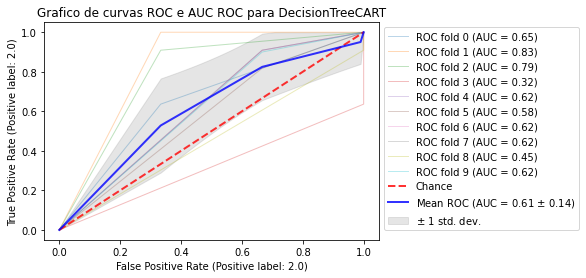


#----------------------#
--  DecisionTreeCART  --
--  Media dos resultados(media das accuracias): 0.748352 
--  Desvio padrao dos resultados: 0.111385 


In [158]:
# Treinamento do modelo DecisionTreeCART usando validação cruzada
CARTacc=[]
CARTmat=[]

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

# Aplicando validação cruzada no loop
for i, (train, test) in enumerate(kfold.split(X_train,Y_train)):
    DecisionTreeCART.fit(X_train[train], Y_train[train])
    predictions = DecisionTreeCART.predict(X_train[test])
    CARTacc.append(accuracy_score(Y_train[test], predictions))
    CARTmat.append(confusion_matrix(Y_train[test], predictions))
    print(str(i+1)+'° iteracao:')
    print(classification_report(Y_train[test], predictions))

    # Criação do gráfico das curvas ROC e AUC ROC seguindo exemplo disponibilizado pelo sklearn
    viz = RocCurveDisplay.from_estimator(
          DecisionTreeCART,
          X_train[test],
          Y_train[test],
          name="ROC fold {}".format(i),
          alpha=0.3,
          lw=1,
          ax=ax,
      )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Grafico de curvas ROC e AUC ROC para DecisionTreeCART",
)
ax.legend(bbox_to_anchor=(1, 1))
fig.patch.set_facecolor('white')
plt.show()    

results.append(np.array(CARTacc))
names.append('DecisionTreeCART')

# Pritando medias de acuracia e desvio padrão
print('\n#----------------------#')
print('--  DecisionTreeCART  --')
print('--  Media dos resultados(media das accuracias): %f ' % (np.array(CARTacc).mean()))
print('--  Desvio padrao dos resultados: %f ' % (np.array(CARTacc).std()))


In [159]:
# Acuracias de cada iteração e matrizes de confusão para DecisionTreeCART
print('--  DecisionTreeCART  --')
for i in range(len(CARTacc)):
  print(str(i+1)+'° iteracao:')
  print("Accuracia:",CARTacc[i])
  print("Matriz de confusao:\n",CARTmat[i],'\n')

--  DecisionTreeCART  --
1° iteracao:
Accuracia: 0.6428571428571429
Matriz de confusao:
 [[2 1]
 [4 7]] 

2° iteracao:
Accuracia: 0.9285714285714286
Matriz de confusao:
 [[ 2  1]
 [ 0 11]] 

3° iteracao:
Accuracia: 0.8571428571428571
Matriz de confusao:
 [[ 2  1]
 [ 1 10]] 

4° iteracao:
Accuracia: 0.5
Matriz de confusao:
 [[0 3]
 [4 7]] 

5° iteracao:
Accuracia: 0.7857142857142857
Matriz de confusao:
 [[ 1  2]
 [ 1 10]] 

6° iteracao:
Accuracia: 0.7142857142857143
Matriz de confusao:
 [[1 2]
 [2 9]] 

7° iteracao:
Accuracia: 0.7857142857142857
Matriz de confusao:
 [[ 1  2]
 [ 1 10]] 

8° iteracao:
Accuracia: 0.7857142857142857
Matriz de confusao:
 [[ 1  2]
 [ 1 10]] 

9° iteracao:
Accuracia: 0.7142857142857143
Matriz de confusao:
 [[ 0  3]
 [ 1 10]] 

10° iteracao:
Accuracia: 0.7692307692307693
Matriz de confusao:
 [[1 2]
 [1 9]] 



**floresta randômica (i.e. m=19):**

1° iteracao:
              precision    recall  f1-score   support

         1.0       0.67      0.67      0.67         3
         2.0       0.91      0.91      0.91        11

    accuracy                           0.86        14
   macro avg       0.79      0.79      0.79        14
weighted avg       0.86      0.86      0.86        14

2° iteracao:
              precision    recall  f1-score   support

         1.0       1.00      0.33      0.50         3
         2.0       0.85      1.00      0.92        11

    accuracy                           0.86        14
   macro avg       0.92      0.67      0.71        14
weighted avg       0.88      0.86      0.83        14

3° iteracao:
              precision    recall  f1-score   support

         1.0       0.50      0.33      0.40         3
         2.0       0.83      0.91      0.87        11

    accuracy                           0.79        14
   macro avg       0.67      0.62      0.63        14
weighted avg       0.76      0.79  

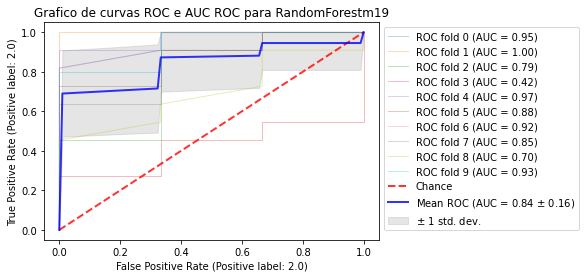


#----------------------#
--  RandomForestm19  --
--  Media dos resultados(media das accuracias): 0.806044 
--  Desvio padrao dos resultados: 0.095581 


In [160]:
# Treinamento do modelo RandomForestm19 usando validação cruzada
RFm19acc=[]
RFm19mat=[]

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

# Aplicando validação cruzada no loop
for i, (train, test) in enumerate(kfold.split(X_train,Y_train)):
    RandomForestm19.fit(X_train[train], Y_train[train])
    predictions = RandomForestm19.predict(X_train[test])
    RFm19acc.append(accuracy_score(Y_train[test], predictions))
    RFm19mat.append(confusion_matrix(Y_train[test], predictions))
    print(str(i+1)+'° iteracao:')
    print(classification_report(Y_train[test], predictions))

    # Criação do gráfico das curvas ROC e AUC ROC seguindo exemplo disponibilizado pelo sklearn

    viz = RocCurveDisplay.from_estimator(
          RandomForestm19,
          X_train[test],
          Y_train[test],
          name="ROC fold {}".format(i),
          alpha=0.3,
          lw=1,
          ax=ax,
      )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Grafico de curvas ROC e AUC ROC para RandomForestm19",
)
ax.legend(bbox_to_anchor=(1, 1))
fig.patch.set_facecolor('white')
plt.show()    

results.append(np.array(RFm19acc))
names.append('RandomForestm19')

# Pritando medias de acuracia e desvio padrão
print('\n#----------------------#')
print('--  RandomForestm19  --')
print('--  Media dos resultados(media das accuracias): %f ' % (np.array(RFm19acc).mean()))
print('--  Desvio padrao dos resultados: %f ' % (np.array(RFm19acc).std()))

In [161]:
# Acuracias de cada iteração e matrizes de confusão para RandomForestm19
print('--  RandomForestm19  --')
for i in range(len(RFm19acc)):
  print(str(i+1)+'° iteracao:')
  print("Accuracia:",RFm19acc[i])
  print("Matriz de confusao:\n",RFm19mat[i],'\n')

--  RandomForestm19  --
1° iteracao:
Accuracia: 0.8571428571428571
Matriz de confusao:
 [[ 2  1]
 [ 1 10]] 

2° iteracao:
Accuracia: 0.8571428571428571
Matriz de confusao:
 [[ 1  2]
 [ 0 11]] 

3° iteracao:
Accuracia: 0.7857142857142857
Matriz de confusao:
 [[ 1  2]
 [ 1 10]] 

4° iteracao:
Accuracia: 0.5714285714285714
Matriz de confusao:
 [[0 3]
 [3 8]] 

5° iteracao:
Accuracia: 0.9285714285714286
Matriz de confusao:
 [[ 3  0]
 [ 1 10]] 

6° iteracao:
Accuracia: 0.7857142857142857
Matriz de confusao:
 [[2 1]
 [2 9]] 

7° iteracao:
Accuracia: 0.8571428571428571
Matriz de confusao:
 [[ 1  2]
 [ 0 11]] 

8° iteracao:
Accuracia: 0.8571428571428571
Matriz de confusao:
 [[ 2  1]
 [ 1 10]] 

9° iteracao:
Accuracia: 0.7142857142857143
Matriz de confusao:
 [[ 0  3]
 [ 1 10]] 

10° iteracao:
Accuracia: 0.8461538461538461
Matriz de confusao:
 [[3 0]
 [2 8]] 



**floresta randômica (i.e. m=4):**

1° iteracao:
              precision    recall  f1-score   support

         1.0       0.75      1.00      0.86         3
         2.0       1.00      0.91      0.95        11

    accuracy                           0.93        14
   macro avg       0.88      0.95      0.90        14
weighted avg       0.95      0.93      0.93        14

2° iteracao:
              precision    recall  f1-score   support

         1.0       1.00      0.33      0.50         3
         2.0       0.85      1.00      0.92        11

    accuracy                           0.86        14
   macro avg       0.92      0.67      0.71        14
weighted avg       0.88      0.86      0.83        14

3° iteracao:
              precision    recall  f1-score   support

         1.0       1.00      0.33      0.50         3
         2.0       0.85      1.00      0.92        11

    accuracy                           0.86        14
   macro avg       0.92      0.67      0.71        14
weighted avg       0.88      0.86  

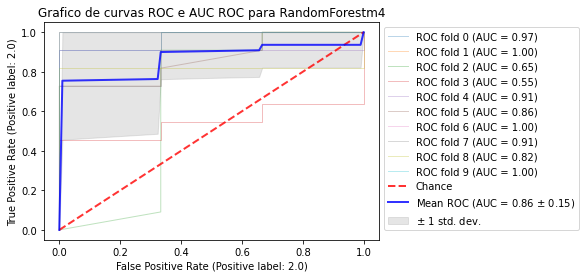


#----------------------#
--  RandomForestm4  --
--  Media dos resultados(media das accuracias): 0.835165 
--  Desvio padrao dos resultados: 0.090083 


In [162]:
# Treinamento do modelo RandomForestm4 usando validação cruzada
RFm4acc=[]
RFm4mat=[]

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

# Aplicando validação cruzada no loop
for i, (train, test) in enumerate(kfold.split(X_train,Y_train)):
    RandomForestm4.fit(X_train[train], Y_train[train])
    predictions = RandomForestm4.predict(X_train[test])
    RFm4acc.append(accuracy_score(Y_train[test], predictions))
    RFm4mat.append(confusion_matrix(Y_train[test], predictions))
    print(str(i+1)+'° iteracao:')
    print(classification_report(Y_train[test], predictions))

    # Criação do gráfico das curvas ROC e AUC ROC seguindo exemplo disponibilizado pelo sklearn
    viz = RocCurveDisplay.from_estimator(
          RandomForestm4,
          X_train[test],
          Y_train[test],
          name="ROC fold {}".format(i),
          alpha=0.3,
          lw=1,
          ax=ax,
      )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Grafico de curvas ROC e AUC ROC para RandomForestm4",
)
ax.legend(bbox_to_anchor=(1, 1))
fig.patch.set_facecolor('white')
plt.show()    

results.append(np.array(RFm4acc))
names.append('RandomForestm4')

# Pritando medias de acuracia e desvio padrão
print('\n#----------------------#')
print('--  RandomForestm4  --')
print('--  Media dos resultados(media das accuracias): %f ' % (np.array(RFm4acc).mean()))
print('--  Desvio padrao dos resultados: %f ' % (np.array(RFm4acc).std()))

In [163]:
# Acuracias de cada iteração e matrizes de confusão para RandomForestm4
print('--  RandomForestm4  --')
for i in range(len(RFm4acc)):
  print(str(i+1)+'° iteracao:')
  print("Accuracia:",RFm4acc[i])
  print("Matriz de confusao:\n",RFm4mat[i],'\n')

--  RandomForestm4  --
1° iteracao:
Accuracia: 0.9285714285714286
Matriz de confusao:
 [[ 3  0]
 [ 1 10]] 

2° iteracao:
Accuracia: 0.8571428571428571
Matriz de confusao:
 [[ 1  2]
 [ 0 11]] 

3° iteracao:
Accuracia: 0.8571428571428571
Matriz de confusao:
 [[ 1  2]
 [ 0 11]] 

4° iteracao:
Accuracia: 0.6428571428571429
Matriz de confusao:
 [[0 3]
 [2 9]] 

5° iteracao:
Accuracia: 0.9285714285714286
Matriz de confusao:
 [[ 3  0]
 [ 1 10]] 

6° iteracao:
Accuracia: 0.7857142857142857
Matriz de confusao:
 [[ 1  2]
 [ 1 10]] 

7° iteracao:
Accuracia: 0.8571428571428571
Matriz de confusao:
 [[ 1  2]
 [ 0 11]] 

8° iteracao:
Accuracia: 0.8571428571428571
Matriz de confusao:
 [[ 2  1]
 [ 1 10]] 

9° iteracao:
Accuracia: 0.7142857142857143
Matriz de confusao:
 [[ 0  3]
 [ 1 10]] 

10° iteracao:
Accuracia: 0.9230769230769231
Matriz de confusao:
 [[3 0]
 [1 9]] 



## **Comparando os modelos:**

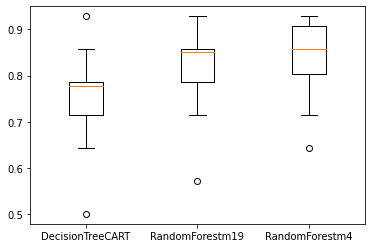

In [164]:
# Comapandado os 3 modelos em grafico de box das acuracias:
fig, ax = plt.subplots()
ax.boxplot(results, labels=names)
fig.patch.set_facecolor('white')
pyplot.show()
# Podemos notar que o RandomForest-m4 pode ser considerado melhor

In [165]:
# Comparação das medias das acuracias e desvios padrões dos modelos 
print("Comparando acuracias e desvios padrões:\n")
for (model,result)in zip(names,results):
    print("%s -> %0.5f(%0.5f)" % (model,result.mean(),result.std()))

Comparando acuracias e desvios padrões:

DecisionTreeCART -> 0.74835(0.11139)
RandomForestm19 -> 0.80604(0.09558)
RandomForestm4 -> 0.83516(0.09008)


## **Mostrando features mais importantes para o melhor modelo:**

Lista de Importancias:

1-AGE: Score: 0.07085
2-SEX: Score: 0.00887
3-STEROID: Score: 0.01508
4-ANTIVIRALS: Score: 0.00700
5-FATIGUE: Score: 0.02631
6-MALAISE: Score: 0.02092
7-ANOREXIA: Score: 0.01638
8-LIVER_BIG: Score: 0.01466
9-LIVER_FIRM: Score: 0.01540
10-SPLEEN_PALPABLE: Score: 0.01726
11-SPIDERS: Score: 0.06385
12-ASCITES: Score: 0.07665
13-VARICES: Score: 0.04000
14-BILIRUBIN: Score: 0.15772
15-ALK_PHOSPHATE: Score: 0.11338
16-SGOT: Score: 0.05219
17-ALBUMIN: Score: 0.14956
18-PROTIME: Score: 0.11304
19-HISTOLOGY: Score: 0.02086

Duas maiores Importancias:
1°: BILIRUBIN -> 0.1577213615433214
2°: ALBUMIN -> 0.14956261577267826 



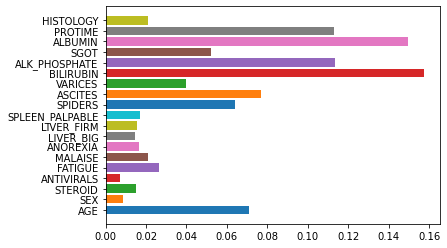

In [166]:
# Printando grafico e lista de variaveis mais importantes para o melhor modelo 
fig, ax = plt.subplots()

maxImp=[['n/a',0],['n/a',0]]

print("Lista de Importancias:\n")

for i,(feat, imp) in enumerate(zip(df_train.columns, RandomForestm4.feature_importances_)):
	print('%d-%s: Score: %.5f' % (i+1, feat, imp))
	ax.barh(feat, imp, label=feat)
	if maxImp[1][1]<imp:
		if maxImp[0][1]<imp:
			maxImp[1][1]=maxImp[0][1]
			maxImp[1][0]=maxImp[0][0]
			maxImp[0][1]=imp
			maxImp[0][0]=feat
		else:	
			maxImp[1][1]=imp
			maxImp[1][0]=feat

# Printando as duas variaveis mais importantes para o melhor modelo 
print("\nDuas maiores Importancias:")
print("1°:",maxImp[0][0],"->",maxImp[0][1])
print("2°:",maxImp[1][0],"->",maxImp[1][1],"\n")

fig.patch.set_facecolor('white')
plt.show() 


## **Resultados finais do melhor modelo usando os dados de validação:**

In [167]:
# Aplicando predições, score de acuracia, matriz de confusão e report
predictions = RandomForestm4.predict(X_validation)
print("Acuracia:",accuracy_score(Y_validation, predictions),"\n")
print("Matriz de confusao:\n", confusion_matrix(Y_validation, predictions),"\n")
print("classification report:")
print(classification_report(Y_validation, predictions))

Acuracia: 0.9375 

Matriz de confusao:
 [[ 2  0]
 [ 1 13]] 

classification report:
              precision    recall  f1-score   support

         1.0       0.67      1.00      0.80         2
         2.0       1.00      0.93      0.96        14

    accuracy                           0.94        16
   macro avg       0.83      0.96      0.88        16
weighted avg       0.96      0.94      0.94        16



# **Referências:**

### Inspiração para análise de dados e treinamento/comparação dos modelos: https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
### Código para plotagem ideal das curvas ROC e AUX-ROC com a validação cruzada: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html

